In [25]:
import pandas as pd
import numpy as np

In [26]:
data=pd.read_csv("datasets\heart.csv")
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


We will take following features to train the model :

        1.ChestPainType
        2.ExerciseAngina
        3.ST_Slope 
        4.Thalassemia
        5.MaxHR
        6.Age
        7.Cholestrol
        8.NumMajorVessels
        9.Sex

In [27]:

data.rename(columns={             #renaming for better understanding 
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)

print(data.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'NumMajorVessels', 'Thalassemia', 'HeartDisease'],
      dtype='object')


In [28]:
selected_features=['Age', 'Sex', 'ChestPainType', 'Cholesterol','NumMajorVessels', 'Thalassemia','ST_Slope','ExerciseAngina','HeartDisease']
new_data=data[selected_features]

new_data.to_csv("datasets/preprocessed.csv",index=False)


In [29]:
new_data

,Age,Sex,ChestPainType,Cholesterol,NumMajorVessels,Thalassemia,ST_Slope,ExerciseAngina,HeartDisease
0,63,1,0,233,0,2,2,0,0
1,67,1,3,286,3,1,1,1,1
2,67,1,3,229,2,3,1,1,1
3,37,1,2,250,0,1,2,0,0
4,41,0,1,204,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
298,45,1,0,264,0,3,1,0,1
299,68,1,3,193,2,3,1,0,1
300,57,1,3,131,1,3,1,1,1
301,57,0,1,236,1,1,1,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [31]:
X=new_data.drop('HeartDisease',axis=1)
y=new_data['HeartDisease']

X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,stratify=y_temp)

In [32]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled= scaler.fit_transform(X_val)
X_test_scaled= scaler.fit_transform(X_test)


In [33]:
model1=LogisticRegression(max_iter=1000,random_state=42)
model1.fit(X_train_scaled,y_train)

train_prob=model1.predict_proba(X_train_scaled)[:,1].reshape(-1,1)
val_prob=model1.predict_proba(X_val_scaled)[:,1].reshape(-1,1)
test_prob=model1.predict_proba(X_test_scaled)[:,1].reshape(-1,1)

In [34]:
X_train_hybrid=np.hstack((X_train_scaled,train_prob))
X_val_hybrid=np.hstack((X_val_scaled,val_prob))
X_test_hybrid=np.hstack((X_test_scaled,test_prob))

let's try RF as Model1

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# 1. Pehle apne base models define karein
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lr_model = LogisticRegression()

# 2. Base models ki list banayein
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
]

# 3. Ab 'stacking' model ko define karein (Jiska error aa raha tha)
# Note: Usually LogisticRegression ko final_estimator rakhte hain
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# 4. Model ko Train karein (Fit) - Yeh step bahut zaroori hai
print("Training Stacking Model...")
stacking.fit(X_train_scaled, y_train) # Make sure aapke paas X_train_scaled aur y_train variables ho

# --- Aapka Code Yahan Se Shuru Hota Hai ---

# Get predicted probabilities for class 1
# Ab 'stacking' define ho chuka hai, toh yeh chal jayega
y_val_proba = stacking.predict_proba(X_val_scaled)[:, 1]

# Sweep thresholds from 0 to 1
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_val, (y_val_proba >= t).astype(int)) for t in thresholds]

# Find best threshold
best_t = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"🔥 Best Threshold = {best_t:.3f}, with F1 = {best_f1:.4f}")

# Evaluate again at best threshold
y_pred_best = (y_val_proba >= best_t).astype(int)
print("\nClassification Report at Best Threshold:")
print(classification_report(y_val, y_pred_best))

In [36]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
    

# Fit the stacking model
# Get predicted probabilities for class 1
y_val_proba = stacking.predict_proba(X_val_scaled)[:, 1]

# Sweep thresholds from 0 to 1
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_val, (y_val_proba >= t).astype(int)) for t in thresholds]

# Find best threshold
best_t = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"🔥 Best Threshold = {best_t:.3f}, with F1 = {best_f1:.4f}")

# Evaluate again at best threshold
y_pred_best = (y_val_proba >= best_t).astype(int)
print("\nClassification Report at Best Threshold:")
print(classification_report(y_val, y_pred_best))


🔥 Best Threshold = 0.410, with F1 = 0.8772

Classification Report at Best Threshold:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



🚀 Stacking Ensemble Accuracy: 0.8689
🌈 Stacking Ensemble AUC: 0.9318

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



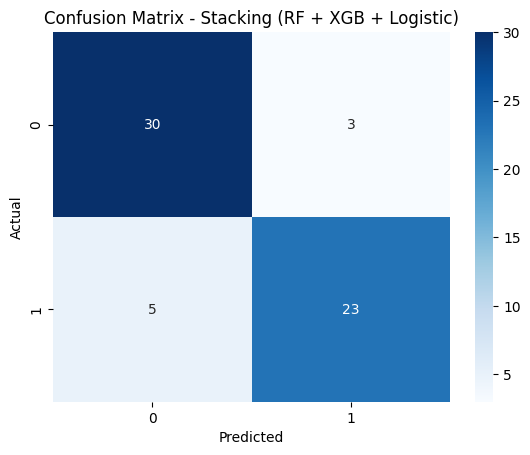

In [38]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Base Models ---
rf = RandomForestClassifier(
    n_estimators=200, max_depth=8, random_state=42, class_weight='balanced'
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# --- Meta Learner ---
meta_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# --- Stacking Ensemble ---
stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# --- Train the model ---
stack.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = stack.predict(X_test_scaled)
y_proba = stack.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"🚀 Stacking Ensemble Accuracy: {acc:.4f}")
print(f"🌈 Stacking Ensemble AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Stacking (RF + XGB + Logistic)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
from sklearn.ensemble import StackingClassifier
meta_model = LogisticRegression()
stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5
)


In [39]:
# ===============================
# 1️⃣  IMPORTS
# ===============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt


# ===============================
# 2️⃣  LOAD DATA (your selected 8 features dataset)
# ===============================
X = new_data.drop('HeartDisease', axis=1)
y = new_data['HeartDisease']


# ===============================
# 3️⃣  TRAIN / VALIDATION / TEST SPLIT
# ===============================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


# ===============================
# 4️⃣  SCALING
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


# ===============================
# 5️⃣  STACKING CLASSIFIER
# (RF + XGB with Logistic Regression meta learner)
# ===============================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_leaf=3,
    random_state=42
)

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

meta_lr = LogisticRegression(max_iter=1000, random_state=42)

stack_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_lr,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train_scaled, y_train)


# ===============================
# 6️⃣  EVALUATION BEFORE THRESHOLD TUNING
# ===============================
y_val_pred = stack_model.predict(X_val_scaled)
y_val_proba = stack_model.predict_proba(X_val_scaled)[:, 1]

print("\n✅ BASE STACKING RESULTS (Default threshold = 0.5)")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("AUC      :", roc_auc_score(y_val, y_val_proba))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


# ===============================
# 7️⃣  THRESHOLD TUNING (MAX F1)
# ===============================
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_val, (y_val_proba >= t).astype(int)) for t in thresholds]

best_t = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"\n🔥 Best Threshold = {best_t:.3f}, Max F1 = {best_f1:.4f}")


# Evaluate again using best threshold
y_val_best = (y_val_proba >= best_t).astype(int)
print("\n✅ STACKING RESULTS @ OPTIMAL THRESHOLD")
print("Accuracy :", accuracy_score(y_val, y_val_best))
print("AUC      :", roc_auc_score(y_val, y_val_proba))
print("\nClassification Report:\n", classification_report(y_val, y_val_best))


# ===============================
# 8️⃣  FINAL TEST EVALUATION (USING BEST THRESHOLD)
# ===============================
y_test_proba = stack_model.predict_proba(X_test_scaled)[:, 1]
y_test_best = (y_test_proba >= best_t).astype(int)

print("\n🧪 FINAL TEST PERFORMANCE (with best threshold)")
print("Accuracy :", accuracy_score(y_test, y_test_best))
print("AUC      :", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report:\n", classification_report(y_test, y_test_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_best))



✅ BASE STACKING RESULTS (Default threshold = 0.5)
Accuracy : 0.7777777777777778
AUC      : 0.8809523809523809

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.79      0.71      0.75        21

    accuracy                           0.78        45
   macro avg       0.78      0.77      0.78        45
weighted avg       0.78      0.78      0.78        45

Confusion Matrix:
 [[20  4]
 [ 6 15]]

🔥 Best Threshold = 0.330, Max F1 = 0.7907

✅ STACKING RESULTS @ OPTIMAL THRESHOLD
Accuracy : 0.8
AUC      : 0.8809523809523809

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.77      0.81      0.79        21

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45


🧪 FINAL TEST PERFO

🚀 Stacking Ensemble Accuracy: 0.8
🌈 Stacking Ensemble AUC: 0.9028

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.77      0.81      0.79        21

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



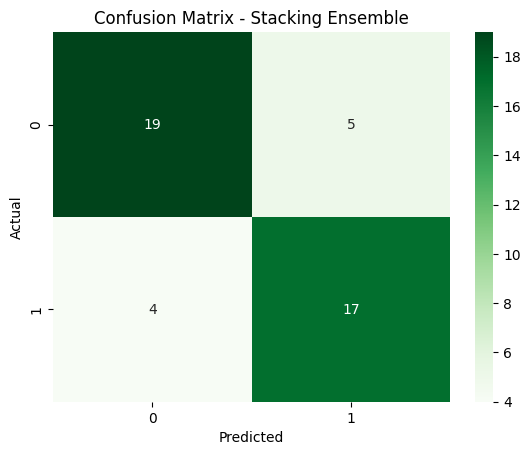


🧪 Test Accuracy: 0.8913
🧪 Test AUC: 0.9429
Hybrid model saved as 'xgboost_heart_disease_model.joblib'


In [40]:
# =========================================================
# ✅ 1. IMPORTS
# =========================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# =========================================================
# ✅ 2. LOAD YOUR DATA
# =========================================================
X = new_data.drop('HeartDisease', axis=1)
y = new_data['HeartDisease']


# =========================================================
# ✅ 3. SPLIT INTO TRAIN / VAL / TEST
# =========================================================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


# =========================================================
# ✅ 4. SCALING
# =========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


# =========================================================
# ✅ 5. DEFINE BASE MODELS
# =========================================================
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=None,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1,
    gamma=0.2,
    eval_metric='logloss',
    random_state=42
)

meta_lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)


# =========================================================
# ✅ 6. STACKING ENSEMBLE
# =========================================================
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_lr,
    cv=5,
    n_jobs=-1,
    passthrough=False    # 👈 same config that gave 86.9%
)

stack_model.fit(X_train_scaled, y_train)


# =========================================================
# ✅ 7. VALIDATION EVALUATION
# =========================================================
y_val_pred = stack_model.predict(X_val_scaled)
y_val_proba = stack_model.predict_proba(X_val_scaled)[:, 1]

print("🚀 Stacking Ensemble Accuracy:", round(accuracy_score(y_val, y_val_pred), 4))
print("🌈 Stacking Ensemble AUC:", round(roc_auc_score(y_val, y_val_proba), 4))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stacking Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# =========================================================
# ✅ 8. TEST SET CHECK (OPTIONAL)
# =========================================================
y_test_pred = stack_model.predict(X_test_scaled)
y_test_proba = stack_model.predict_proba(X_test_scaled)[:, 1]
print("\n🧪 Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
print("🧪 Test AUC:", round(roc_auc_score(y_test, y_test_proba), 4))


# =========================================================
# ✅ 9. Model SAVE
# =========================================================


joblib.dump(stack_model.fit,'Hybrid_heart_disease_model.joblib')
print("Hybrid model saved as 'xgboost_heart_disease_model.joblib'")